In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# T-test con Python

> Test estadístico para comparar las medias de dos grupos.

## Introducción

**El t-test**, también conocido como prueba t de Student, es un test estadístico empleado para analizar si dos muestras proceden de poblaciones con la misma media. Para ello, cuantifica la diferencia entre la media de las dos muestras y, teniendo en cuenta la varianza de estas, estima cómo de probable es obtener una diferencia igual o mayor que la observada si la hipótesis nula de que las medias poblacionales son iguales fuese cierta. A la probabilidad estimada por el test se le conoce como p-value.

Un _p-value_ mayor que un determinado límite, por ejemplo _5%_ o _1%_, indica que la diferencia observada puede deberse al azar, por lo que no se rechaza la hipótesis nula. Por el contrario, cuando el _p-value_ es menor que el límite seleccionado, se considera que existen evidencias suficientes para rechazar que las muestras proceden de poblaciones con misma media.

Cuando se dispone de dos muestras, el hecho de que sus valores promedio no sean exactamente iguales no implica que haya evidencias de una diferencia real. Dado que cada muestra tiene su propia variabilidad debida al muestreo aleatorio, aunque procedan de la misma población, las medias muestrales no tienen por qué ser iguales. Es aquí donde el **t-test** aporta valor. Es un test estadístico para comparar la media entre dos muestras.

Existen múltiples adaptaciones del t-test dependiendo si los datos son independientes o pareados, si la varianza es la misma en las dos muestras, o qué tipo de diferencias se quieren detectar. En este documento se muestra cómo utilizar las implementaciones disponibles en la librería Pingouin para realizar t-Test en python.

## T-test para muestras independientes

> Dos muestras se consideran independientes si las observaciones se han obtenido de forma aleatoria y no guardan relación unas con otras.

### Hipótesis contrastadas

Las hipótesis contrastadas por el t-test de muestras independientes son:

- $H_0$: no hay diferencias entre las medias: $\mu_x = \mu_y$

- $H_a$: sí hay diferencias entre las medias: $\mu_x \neq \mu_y$

### Estadístico T

El estadístico utilizado por el t-test de muestras independientes se calcula como:

$$t = \frac{\overline{x} - \overline{y}}
{\sqrt{\frac{s^{2}_{x}}{n_{x}} + \frac{s^{2}_{y}}{n_{y}}}}$$

donde $\overline{x}$ y $\overline{y}$ son las medias muestrales, $n_x$ y $n_y$ son el número de observaciones en cada muestra, $s^{2}_{x}%$ y $s^{2}_{y}$ las varianzas de cada muestra.

El estadístico t sigue una distribución conocida como distribución t de Student. Esta distribución se asemeja en gran medida a la distribución normal, tiene como parámetros la media, la varianza y además, a través de los grados de libertad, permite flexibilizar las colas en función del tamaño que tenga la muestra. A medida que se reduce el tamaño muestral, la probabilidad acumulada en las colas aumenta, siendo así menos estricta de lo cabría esperar en una distribución normal. Una distribución t de Student con 30 o más grados de libertad es prácticamente igual a una distribución normal.

Existen varias formas para calcular los grados de libertad $(v)$ de la distribución t de Student. Dos de los más utilizados son:

$$v = n_x + n_y - 2$$

cuando el tamaño de las muestras es el mismo, y

$$v = \frac{(\frac{s^{2}_{x}}{n_{x}} + \frac{s^{2}_{y}}{n_{y}})^{2}}
{\frac{(\frac{s^{2}_{x}}{n_{x}})^{2}}{(n_{x}-1)} +
\frac{(\frac{s^{2}_{y}}{n_{y}})^{2}}{(n_{y}-1)}}$$

cuando los tamaños no son iguales (desbalanceados). Esta última se conoce como la corrección de Welch–Satterthwaite.

### Condiciones de un t-test para muestras independientes

Las condiciones de un t-test de muestras independientes, tanto para calcular intervalos de confianza como para contraste de hipótesis son:

#### Independencia

Las observaciones tienen que ser independientes unas de las otras. Para ello, el muestreo debe ser aleatorio y el tamaño de la muestra inferior al 10% de la población.

#### Normalidad

Las poblaciones que se comparan tienen que distribuirse de forma normal. A pesar de que la condición de normalidad recae sobre las poblaciones, normalmente no se dispone de información sobre ellas, por lo que las muestras (dado que son reflejo de la población) tienen que distribuirse de forma aproximadamente normal. En caso de cierta asimetría los t-test son considerablemente robustos cuando el tamaño de las muestras es igual o mayor a 30.

#### Igualdad de varianza (homocedasticidad)

La varianza de ambas poblaciones comparadas debe de ser igual. Tal como ocurre con la condición de normalidad, si no se dispone de información de las poblaciones, esta condición se ha de asumir a partir de las muestras. En caso de no cumplirse esta condición, se puede emplear la corrección de Welch. Esta corrección se incorpora a través de los grados de libertad y permite compensar la diferencia de varianzas. El número de grados de libertad de un _Welch Two Sample t-test_ viene dado por la siguiente función:

$$f=\frac{(\frac{\widehat{S}^{2}_{x}}{n_x} + \frac{\widehat{S}^{2}_{y}}{n_y})^2} {\frac{1}{n_x+1}(\frac{\widehat{S}^{2}_{x}}{n_x})^2 + \frac{1}{n_y+1}(\frac{\widehat{S}^{2}_{y}}{n_y})^2} - 2$$

Si las condiciones anteriores se cumplen, el parámetro estimado, en este caso la diferencia de medias muestrales $(\overline{x} - \overline{y})$, sigue una distribución t de Student (grados libertad, mean = parámetro estimado, sd = SE)

El error estándar (SE) de una distribución t de Student para comparar medias se define como la raíz cuadrada de la suma de las varianzas, divididas por el tamaño de cada muestra.

$$SE=\sqrt{\frac{\widehat{S}^{2}_{x}}{n_x} + \frac{\widehat{S}^{2}_{y}}{n_y}}$$

El proceso a seguir para calcular intervalos de confianza o test de hipótesis es el mismo que el seguido en el modelo Normal. La única diferencia es que, en lugar de emplear Z-scores (cuantiles de la distribución normal), se emplean los T-scores (cuantiles de la distribución t-student).

## Contraste de hipótesis

Los pasos a seguir para realizar un t-test con el objetivo de determinar si la diferencia entre medias es significativa son:

1. Establecer las hipótesis.

2. Calcular el estadístico (parámetro estimado) que se va a emplear.

3. Determinar el tipo de test, una o dos colas.

4. Determinar el nivel de significancia $\alpha$

5. Cálculo de p-value y comparación con el nivel de significancia establecido.

6. Cálculo del tamaño del efecto (opcional pero recomendado).

7. Conclusiones.

### Establecer las hipótesis

La hipótesis nula $H_0$ es la hipótesis escéptica, la que considera que no hay diferencia o cambio. En el caso de comparar dos medias independientes la hipótesis nula considera que $\mu_1 =\mu_2$

La hipótesis alternativa $H_a$ considera que la hipótesis nula no se cumple. En el caso de comparar dos medias independientes, la hipótesis alternativa considera que $\mu_1 \neq \mu_2$

### Calcular el estadístico

El estadístico es el valor que se calcula a partir de la muestra y que se quiere extrapolar a la población de origen. En este caso, la diferencia de medias.

### Determinar el tipo de test, una o dos colas

Los test de hipótesis pueden ser de una o de dos colas. Si la hipótesis alternativa emplea ">" o "<" se trata de un test de una cola, en el que solo se analizan desviaciones en un sentido. Si la hipótesis alternativa es del tipo "diferente de" se trata de un test de dos colas, en el que se analizan posibles desviaciones en las dos direcciones. Se recomienda emplear test de una cola solo cuando se sabe con seguridad que las desviaciones de interés es en un sentido y únicamente si se ha determinado antes de observar la muestra, no después.

### Determinar el nivel de significancia $\alpha$

El nivel de significancia $\alpha$ determina la probabilidad de error que se quiere asumir a la hora de rechazar la hipótesis nula. Se emplea como punto de referencia para determinar si el p-value obtenido en el test de hipótesis es suficientemente bajo como para considerar significativas las diferencias observadas y. por lo tanto. rechazar $H_0$. A menor valor de $\alpha$, menor probabilidad de rechazar la hipótesis nula. Por ejemplo, si se considera $\alpha = 0.05$, se rechazará la hipótesis nula en favor de la hipótesis alternativa si el p-value obtenido es menor que 0.05, y se tendrá una probabilidad del 5% de haber rechazado $H_0$ cuando realmente es cierta. En nivel de significancia debe establecerse en función de que error sea más costoso:

- Error tipo I: error de rechazar la hipótesis nula cuando realmente es cierta.

- Error tipo II: error de considerar como cierta la hipótesis nula cuando realmente es falsa.

### Cálculo de p-value y comparación con el nivel de significancia

Utilizando una distribución t de Student, calcular la probabilidad de obtener un valor del estadístico t mayor o igual mayor que el observado.

### Tamaño del efecto

El tamaño del efecto o también llamado effect size es la diferencia neta observada entre los grupos de un estudio. No es una inferencia estadística ya que no pretende identificar si las poblaciones son significativamente diferentes, sino que simplemente indica la diferencia observada entre muestras, independientemente de la varianza que tengan. Se trata de un parámetro que siempre debe acompañar a los p-values, ya que un p-value solo indica si hay evidencias significativas para rechazar la hipótesis nula pero no dice nada de si la diferencia es importante o práctica. Esto último se averigua mediante el tamaño del efecto.

En el caso del t-test de medias independientes, existen dos medidas posibles del tamaño del efecto: la d de Cohen y la r de Pearson. Ambas son equivalentes y pueden transformarse de una a otra. Cada una de estas medidas tiene unas magnitudes recomendadas para considerar el tamaño del efecto como pequeño, mediano o grande.

D DE COHEN

$$d= \frac{\text{|diferencia medias|}}{sd}$$

Existen dos formas distintas se utilizan para calcular la sd conjunta de ambas muestras:

$$sd=\sqrt{\frac{n_x sd_x^2 + n_y sd_y^2}{n_x+n_y-2}}$$

Los límites más utilizados para clasificar el tamaño del efecto con d-Cohen son:

- d  ≤ 0.2 pequeño

- d  ≥ 0.5 mediano

- d  = 0.8 grande


R DE PEARSON

$$r= \sqrt{t^2}{(t^2 + gl)}$$

- t = estadístico t obtenido en el test

- gl = grados de libertad del test

Los límites más utilizados para clasificar el tamaño del efecto con r son:

- d  ≤ 0.1 pequeño

- d  ≥ 0.3 mediano

- d  = 0.5 grande

### Interpretación de los resultados

Si el p-value es menor que el valor de $\alpha$ seleccionado, existen evidencias suficientes para rechaza $H_0$ en favor de $H_a$

## Intervalo de confianza

El intervalo de confianza de la diferencia de medias independientes para un nivel de confianza de 1 - $\alpha$ tiene la siguiente estructura:

$$[(\overline{x} - \overline{y}) \pm t_{df, 1-\alpha/2} * \sqrt{\frac{\widehat{S}^{2}_{x}}{n_x} + \frac{\widehat{S}^{2}_{y}}{n_y}}]$$

El valor $t$ depende del porcentaje de seguridad del intervalo de confianza que se quiera obtener. Se define como el valor (cuantil) para el cual en una distribución de Student, con unos determinados grados de libertad, un porcentaje igual al porcentaje de confianza del intervalo queda comprendido entre el valor $-t$ y el valor $+t$.

El valor $t$ puede encontrarse en tablas tabuladas o mediante programas informáticos. En python, el valor $t$ para un determinado intervalo de confianza y grados de libertad se puede obtener con la función `scipy.stats.t.ppf`. Por ejemplor `t.ppf(q=0.95 + 0.05/2, df=15, loc=0, scale=1).`

## Ejemplo

El datset births del paquete de R openintro contiene información sobre 150 nacimientos así como información de las madres. Se quiere determinar si existen evidencias significativas de que el peso de los recién nacidos cuyas madres fuman (smoker) difiere de aquellos cuyas madres no fuman (nonsmoker).

### Librerías

Las librerías utilizadas en este ejemplo son:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg


### Datos

In [2]:
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
    + "Estadistica-machine-learning-python/master/data/births.csv"
)


datos = pd.read_csv(url, sep=",")
datos.head()


,f_age,m_age,weeks,premature,visits,gained,weight,sex_baby,smoke
0,31.0,30,39,full term,13.0,1.0,6.88,male,smoker
1,34.0,36,39,full term,5.0,35.0,7.69,male,nonsmoker
2,36.0,35,40,full term,12.0,29.0,8.88,male,nonsmoker
3,41.0,40,40,full term,13.0,30.0,9.00,female,nonsmoker
4,42.0,37,40,full term,NaN,10.0,7.94,male,nonsmoker


### Hipótesis

$H_0$: no hay diferencia entre las medias poblacionales: $\mu(smoker) - \mu(nonsmoker) = 0$

$H_a$: si hay diferencia entre las medias poblacionales: $\mu(smoker) - \mu(nonsmoker) \neq 0$

## Condiciones

### Independencia

Se trata de un muestreo aleatorio donde el tamaño de las muestras no supera el 10% de todos los nacimientos en Carolina del Norte. Se puede afirmar que los eventos son independientes.

### Normalidad

In [3]:
# Numero de observaciones por grupo

datos.groupby("smoke").size()


smoke
nonsmoker    100
smoker        50
dtype: int64

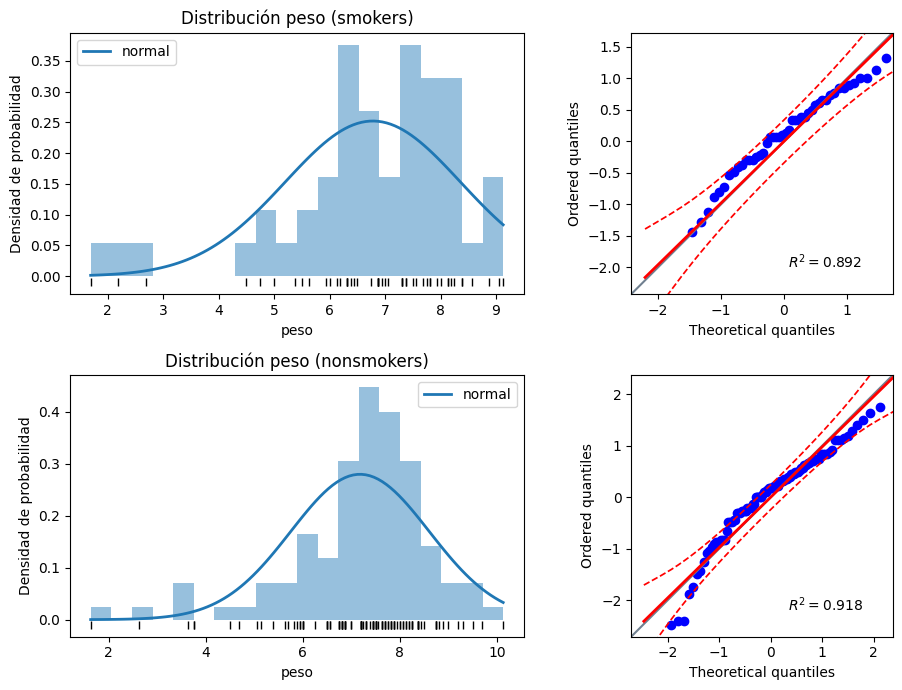

In [4]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_smokers = datos.loc[datos.smoke == "smoker", "weight"]
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_smokers)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_smokers), max(peso_smokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label="normal")
axs[0, 0].hist(x=peso_smokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(peso_smokers, np.full_like(peso_smokers, -0.01), "|k", markeredgewidth=1)
axs[0, 0].set_title("Distribución peso (smokers)")
axs[0, 0].set_xlabel("peso")
axs[0, 0].set_ylabel("Densidad de probabilidad")
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(peso_smokers, dist="norm", ax=axs[0, 1])

peso_nonsmokers = datos.loc[datos.smoke == "nonsmoker", "weight"]
mu, sigma = stats.norm.fit(peso_nonsmokers)
x_hat = np.linspace(min(peso_nonsmokers), max(peso_nonsmokers), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label="normal")
axs[1, 0].hist(x=peso_nonsmokers, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(
    peso_nonsmokers, np.full_like(peso_nonsmokers, -0.01), "|k", markeredgewidth=1
)
axs[1, 0].set_title("Distribución peso (nonsmokers)")
axs[1, 0].set_xlabel("peso")
axs[1, 0].set_ylabel("Densidad de probabilidad")
axs[1, 0].legend()

pg.qqplot(peso_nonsmokers, dist="norm", ax=axs[1, 1])
plt.tight_layout()
plt.show()


In [5]:
# Test de normalidad  Shapiro-Wilk

pg.normality(data=datos, dv="weight", group="smoke")


,W,pval,normal
smoke,,,
smoker,0.894906,0.000328,False
nonsmoker,0.923736,0.000022,False


Los gráficos cuantil-cuantil muestran asimetría hacia la izquierda y el test Shapiro-Wilk encuentran evidencias significativas de que los datos no proceden de poblaciones con distribución normal. Sin embargo, dado que el tamaño de cada grupo es mayor que 30 se puede considerar que el t-test sigue siendo suficientemente robusto, aunque es necesario mencionarlo en las conclusiones. Una alternativa es recurrir a test no paramétrico basado en la mediana (Mann-Withney-Wilcoxon test) o un test de Bootstraping serían más adecuados. Otra opción es estudiar si los datos anómalos son excepciones que se pueden excluir del análisis.

### Igualdad de varianza (homocedasticidad)

Existen varios test que permiten comparar varianzas. Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Leven.

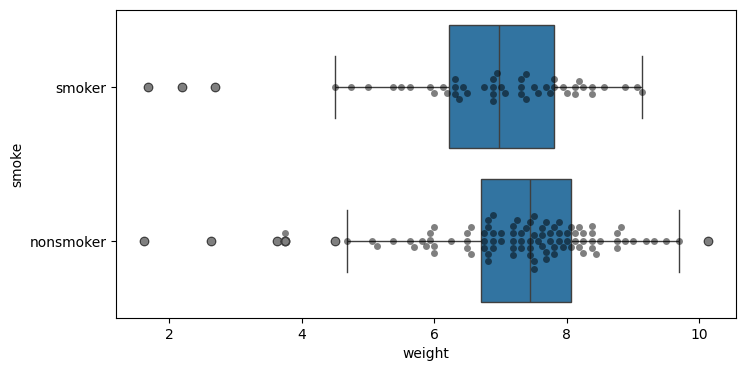

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="smoke", x="weight", data=datos, ax=ax)
sns.swarmplot(y="smoke", x="weight", data=datos, color="black", alpha=0.5, ax=ax)
plt.show()


In [7]:
# Test de homocedasticidad

pg.homoscedasticity(data=datos, dv="weight", group="smoke")


,W,pval,equal_var
levene,0.444176,0.506151,True


No se encuentran evidencias significativas (para alpha = 0.05) de que las varianzas sean distintas entre ambas poblaciones. Si lo fuesen, se tendría que realizar el t-test con la corrección de Welch.

## T-Test

La función `ttest` de paquete Pingouin calcula el _p-value_, intervalos de confianza y tamaño de efecto.

In [8]:
# Test para datos independientes (p-value, intervalo de confianza)

peso_smokers = datos.loc[datos.smoke == "smoker", "weight"]
peso_nonsmokers = datos.loc[datos.smoke == "nonsmoker", "weight"]

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative="two-sided", correction=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.551676,148,two-sided,0.122876,"[-0.91, 0.11]",0.268758,0.553,0.338075


## Conclusión

Dado que p-value (0.1229) es mayor que el nivel de significancia alpha (0.05) , no se dispone de evidencia suficiente para considerar que existe una diferencia real entre el peso promedio de niños nacidos de madres fumadores y el de madres no fumadoras. El tamaño de efecto medido por d-Cohen es pequeño (0.27).

## T-test: Comparación de medias poblacionales dependientes (pareadas)

Dos medias son dependientes o pareadas cuando proceden o muestras dependientes, esto es, cuando existe una relación entre las observaciones de las muestras. Este escenario aparece cuando los resultados se generan a partir de los mismos individuos bajo dos condiciones distintas. Dos ejemplos:

- Comprobar el resultado de dos tipos de exámenes (lectura y escritura) sobre un grupo de alumnos de un colegio, donde cada alumno realiza los dos exámenes.

- Estudios médicos en los que se compara una característica pre-tratamiento y post-tratamiento sobre los mismos individuos.